In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customers/Churn Modeling.csv


In [7]:
import numpy as np
import pandas as pd

# Scikit-learn modules
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, mean_squared_error, 
    r2_score, precision_score, recall_score, f1_score
)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam




# Bokeh for interactive plots
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import linear_cmap, factor_cmap
from bokeh.palettes import Spectral6, Viridis256
from bokeh.models import ColumnDataSource

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Enable Bokeh plots in notebooks
output_notebook()

# Print confirmation
print("Libraries successfully imported and updated!")

Loading BokehJS ...

Libraries successfully imported and updated!


In [8]:
data=pd.read_csv("/kaggle/input/bank-customers/Churn Modeling.csv")

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
data.drop(["RowNumber"],axis=1,inplace=True)

In [15]:
print(data.head())

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  


In [17]:
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':  
        data[col] = le.fit_transform(data[col])

# Neural Network

In [18]:
scaler = StandardScaler()
data = scaler.fit_transform(data)


In [19]:
X = data[:, :-1]  
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from keras.layers import Dense, Input
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="linear")  
])

In [21]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

In [22]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9388 - mean_squared_error: 0.9388 - val_loss: 0.7343 - val_mean_squared_error: 0.7343
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7210 - mean_squared_error: 0.7210 - val_loss: 0.6581 - val_mean_squared_error: 0.6581
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6571 - mean_squared_error: 0.6571 - val_loss: 0.6527 - val_mean_squared_error: 0.6527
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6597 - mean_squared_error: 0.6597 - val_loss: 0.6524 - val_mean_squared_error: 0.6524
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6220 - mean_squared_error: 0.6220 - val_loss: 0.6527 - val_mean_squared_error: 0.6527
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6341 - mean_squared_error: 0.6341 - val_loss: 0.6685 - val_mean_squared_error: 0.6685
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6170 - mean_squared_error: 0.6170 - val_loss: 0.66

In [25]:
history

In [26]:
y_pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.7632816707980725
R^2 Score: 0.21025786296471694


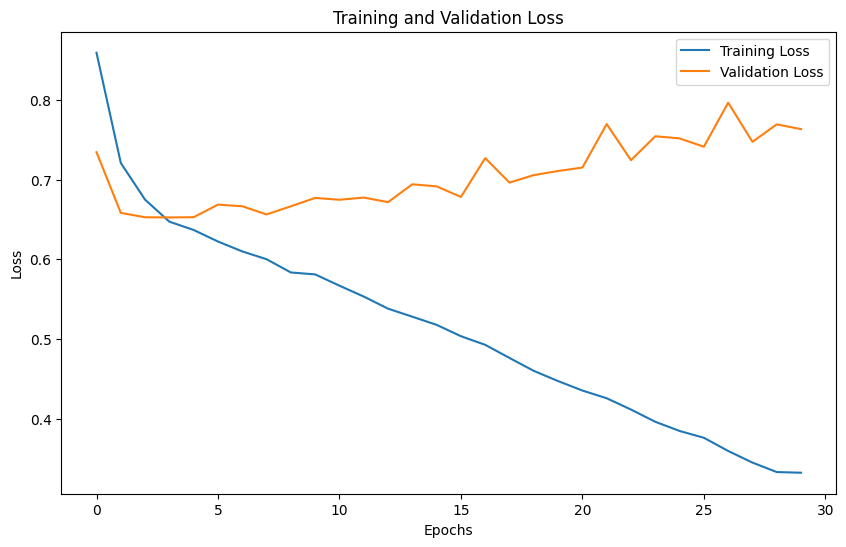

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

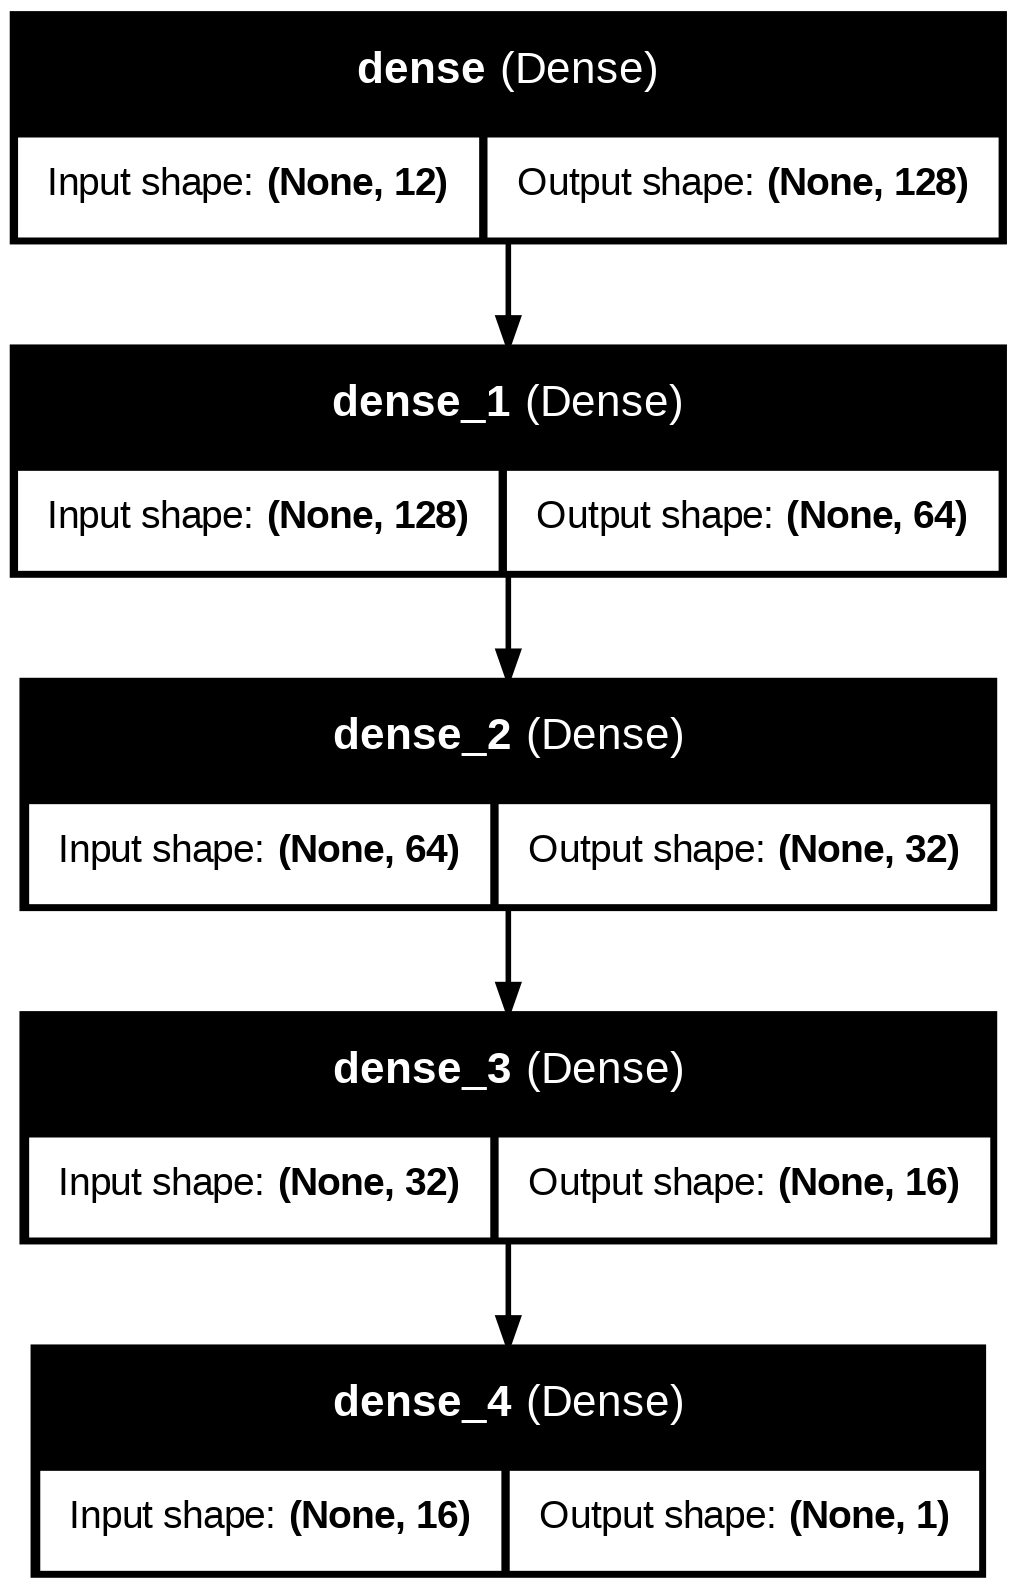

In [30]:
plot_model(model, to_file='neural_network_structure.png', show_shapes=True, show_layer_names=True)